# Music listening history analysis

Import required packages

In [64]:
import lfmxtractplus.export_data as lf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#import calmap as cm
from IPython.display import display, HTML

%matplotlib inline


initialize lfmxtractplus with config.yaml

In [65]:
lf.initialize('C:\\Users\Madhan\PycharmProjects\lfm4pandas\config.yaml')

https://accounts.spotify.com/authorize?client_id=c6df0ec4beda4f589b5984801224bfd6&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback%2F
Paste the above link into your browser, then paste the redirect url here: https://example.com/callback/?code=AQBgZDKYzcvsLqpIn8kEcDuVZuakG_y-dzVo6cRwTVHXdMqieAgax-azjLhzrdA9Gc6sqN65wLieXpj4IqKCn1QZYL2yC77gnnv4HS2ioJHZFGsmk1x3KG8fFMF-hQrqkA-yDrM66lXkMzYxpd-q1oDE05725uzH_K4HAxgXD8lNwYheMJbhn0Ee9ax3hXvGow_lQaU


Get listening history from last.fm and enrich with spotify audio features

In [66]:
scrobbles_dict = lf.generate_dataset(lfusername='madhan_001', pages=0)
scrobbles_df = scrobbles_dict['complete']


Fetching data from last.fm for user madhan_001

15879 total tracks scrobbled by the user

80 total pages to retrieve


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [04:18<00:00,  2.96s/it]




Fetching SpotifyID for tracks


100%|██████████████████████████████████████████████████████████████████████████████| 1866/1866 [08:48<00:00,  3.26it/s]



tracks without spotifyID : 17

Fetching audio features for tracks


100%|██████████████████████████████████████████████████████████████████████████████| 1866/1866 [03:54<00:00,  7.82it/s]


tracks without audio features : 17


Display extracted data

In [67]:
print("Plays by timestamp")
display(HTML(scrobbles_df.head(5).to_html()))

Plays by timestamp


,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,1562348478,2019-07-05 23:11:18+05:30,Greta Van Fleet,0be22557-d8c7-4706-a531-625c4c570162,From The Fires,1d2a4612-587f-4cf6-9c8a-8136aa2763dd,Black Smoke Rising,20e7af43-72da-48c9-8bc1-707bb9e03fd0,28,32BEasyNQgqXQJKoVa0fUw,259893.0,68.0,modern blues rock,0.372,0.911,7.0,-3.949,1.0,0.0694,0.187000,0.0883,0.000199,0.536,200.012
1,1562348215,2019-07-05 23:06:55+05:30,Grimes,7e5a2a59-6d9f-4a17-b7c2-e1eedb7bd222,Art Angels,04cd7071-8236-4d09-95b4-20dc8ded36fe,Flesh Without Blood,2e40404b-b614-497f-9fc7-2c272aa5ef1c,7,4ZcGbQ5dOKX6rJk4yvza9R,264523.0,57.0,art pop,0.481,0.965,8.0,-2.993,1.0,0.0875,0.000904,0.4760,0.000727,0.660,155.938
2,1562347956,2019-07-05 23:02:36+05:30,Grimes,7e5a2a59-6d9f-4a17-b7c2-e1eedb7bd222,Art Angels,04cd7071-8236-4d09-95b4-20dc8ded36fe,Venus Fly,78b69105-4662-4b4d-a8b9-bfd17a871bf2,37,3JI2mIJto0JuYbrq87aFqu,225734.0,54.0,art pop,0.620,0.742,4.0,-7.327,0.0,0.0273,0.000285,0.2970,0.869000,0.252,128.410
3,1562347764,2019-07-05 22:59:24+05:30,All Time Low,62162215-b023-4f0e-84bd-1e9412d5b32c,Future Hearts,0573c7a9-c6bc-48dd-9939-673a64c8dd96,Something's Gotta Give,0f3538e0-2d8c-4d8b-9541-c6ccfa586db9,25,6OPoF9qiuV2dNfJ44w3X4M,189418.0,57.0,neon pop punk,0.496,0.913,4.0,-3.286,1.0,0.0448,0.010100,0.1180,0.000000,0.675,165.981
4,1562347582,2019-07-05 22:56:22+05:30,MØ,3ab2ee23-1c2f-458c-9c8c-ca4844729120,Blur (feat. Foster The People),,Blur (Feat. Foster The People),,18,653SgdD6rQ9YPtsqRgQVzm,181961.0,63.0,dance pop,0.616,0.809,1.0,-4.775,0.0,0.0330,0.014800,0.7180,0.000000,0.468,140.007


In [68]:
library_df = scrobbles_dict['library']
display(HTML(library_df.head(5).to_html()))


,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
0,5 Seconds of Summer,She Looks So Perfect,1,1gugDOSMREb34Xo0c1PlxM,202496.0,68.0,boy band,0.493,0.956,1.0,-4.221,0.0,0.1380,0.000668,0.416,0.000000,0.470,160.006
1,5 Seconds of Summer,Voodoo Doll,1,6NfZsnrGYkMSZhDBZfovNN,197483.0,53.0,boy band,0.469,0.977,2.0,-4.969,1.0,0.1880,0.009870,0.351,0.000000,0.332,144.167
2,5 Seconds of Summer,Want You Back,1,2vHfabj6nFebekTYODqntl,173081.0,70.0,boy band,0.618,0.867,0.0,-4.915,1.0,0.0439,0.006990,0.202,0.000001,0.579,98.030
3,5 Seconds of Summer,Youngblood,48,2iUXsYOEPhVqEBwsqP70rE,203417.0,84.0,boy band,0.596,0.854,7.0,-5.114,0.0,0.4630,0.016900,0.124,0.000000,0.152,120.274
4,88 Fingers Louie,100 Proof,1,5rDjaUk0Bai4fdqN3y3Ezm,150490.0,40.0,chicago hardcore,0.495,0.987,5.0,-2.719,1.0,0.0457,0.000006,0.121,0.000077,0.536,115.892


Unmapped tracks

In [69]:
unmapped_track_df = lf.unmapped_tracks(library_df)
display(HTML(unmapped_track_df.to_html()))
#unmapped_track_df.to_csv("unmappable.tsv", sep='\t')

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo
31,Alessia Cara,"How Far I'll Go - From ""Moana""",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,Avicii,I Could Be The One (Avicii Vs. Nicky Romero) -...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,BABYMETAL,Head Bangya!!,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,Cage the Elephant,Ain't No Rest for the Wicked - Original Version,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,Cansei de Ser Sexy,Off the Hook,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,Eminem ft Ed Sheeran,River,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,Ke$ha,Animal,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,Ke$ha,TiK ToK,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,Kyary Pamyu Pamyu,にんじゃりばんばん,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,Ladybaby,Hoshinonaisora,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dropping rows with unmapped tracks from scrobbles_df

In [70]:
scrobbles_df = scrobbles_df[pd.notnull(scrobbles_df['trackID'])]
display(HTML(lf.unmapped_tracks(scrobbles_df).head(5).to_html()))

,timestamp,datetime,artist_name,artist_mbid,album_name,album_mbid,track_name,track_mbid,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


Dropping rows with unmapped tracks from library_df

In [71]:
library_df = library_df[pd.notnull(library_df['trackID'])]
display(HTML(lf.unmapped_tracks(library_df).head(5).to_html()))

,artist_name,track_name,frequency,trackID,lengthMS,popularity,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,instrumentalness,valence,tempo


creating artist_df to get number of plays from each artist

In [72]:
artist_df = scrobbles_df.groupby(['artist_name']).size().reset_index()
artist_df.rename(columns={0: 'frequency'}, inplace=True)
artist_df.set_index(['artist_name'], inplace=True)
artist_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(artist_df.head(5).to_html()))

,frequency
artist_name,
Linkin Park,734
Melanie Martinez,567
Phoebe Ryan,504
Pierce The Veil,500
Neck Deep,497


plotting barplot for top 20 artists

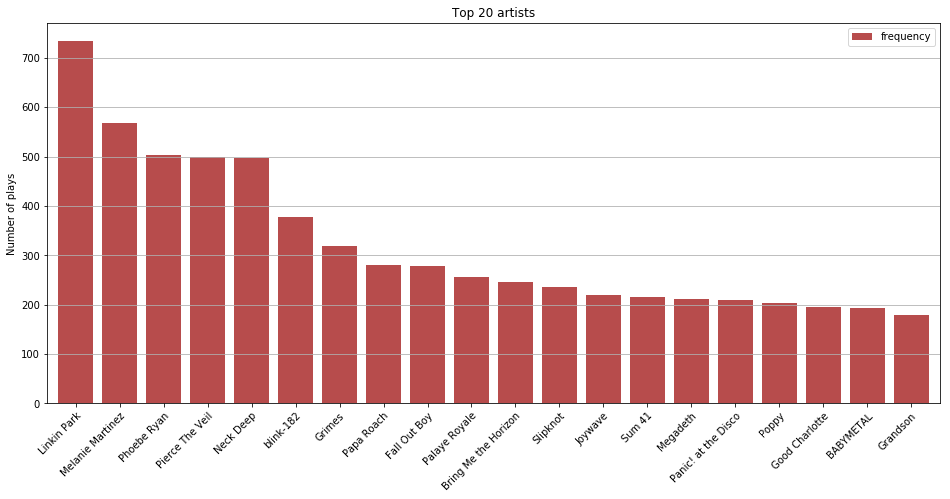

In [73]:
ax = artist_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(artist_df.index,rotation=45, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 artists')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating artist_df to get number of plays from each artist

In [74]:
track_df = scrobbles_df.groupby(['track_name']).size().reset_index()
track_df.rename(columns={0: 'frequency'}, inplace=True)
track_df.set_index(['track_name'], inplace=True)
track_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(track_df.head(5).to_html()))

,frequency
track_name,
Besitos,154
Pin,116
Soap,105
Where Do We Go When We Go,98
Bulls in the Bronx,97


plotting barplot for top 20 tracks

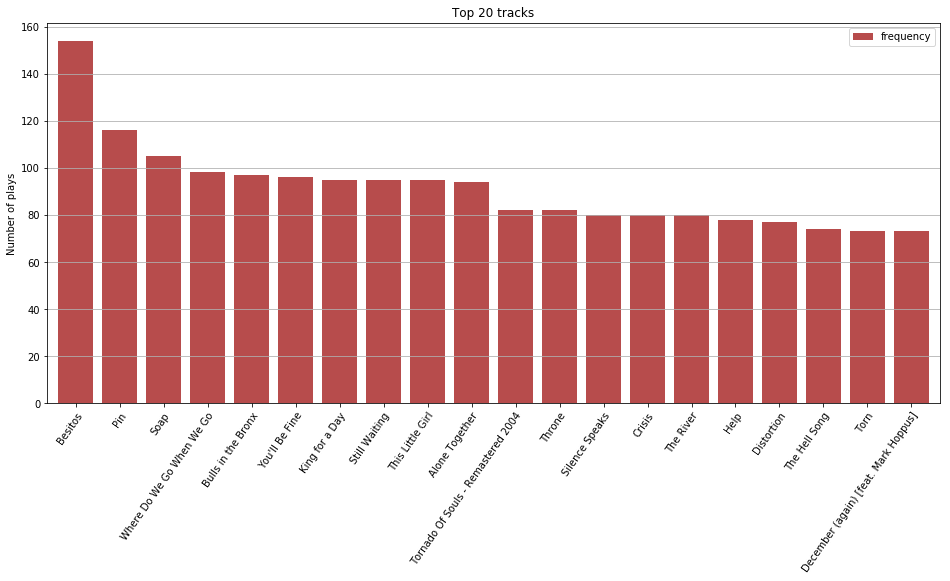

In [75]:
ax = track_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(track_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 tracks')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating album_df to get number of plays from each artist

In [76]:
album_df = scrobbles_df.groupby(['album_name']).size().reset_index()
album_df.rename(columns={0: 'frequency'}, inplace=True)
album_df.set_index(['album_name'], inplace=True)
album_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(album_df.head(5).to_html()))

,frequency
album_name,
Cry Baby (Deluxe),495
Art Angels,266
Collide With the Sky,245
Hybrid Theory (Bonus Track Version),230
The Peace and the Panic,226


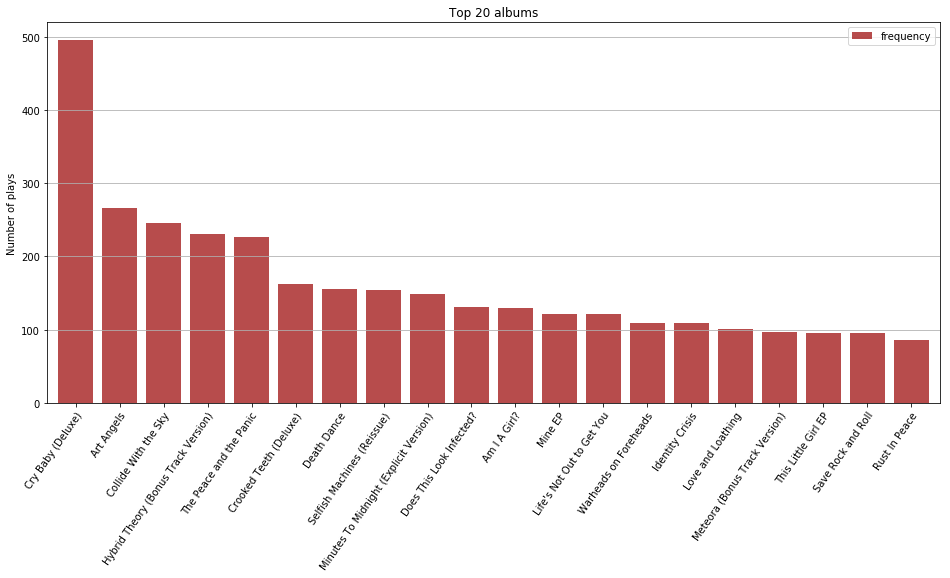

In [77]:
ax = album_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(album_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 albums')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()

creating genre_df to get number of plays from each artist

In [78]:
genre_df = scrobbles_df.groupby(['genre_name']).size().reset_index()
genre_df.rename(columns={0: 'frequency'}, inplace=True)
genre_df.set_index(['genre_name'], inplace=True)
genre_df.sort_values("frequency",inplace=True, ascending=False)
display(HTML(genre_df.head(5).to_html()))

,frequency
genre_name,
alternative metal,2341
dance pop,2329
anthem emo,1248
pop punk,982
modern alternative rock,613


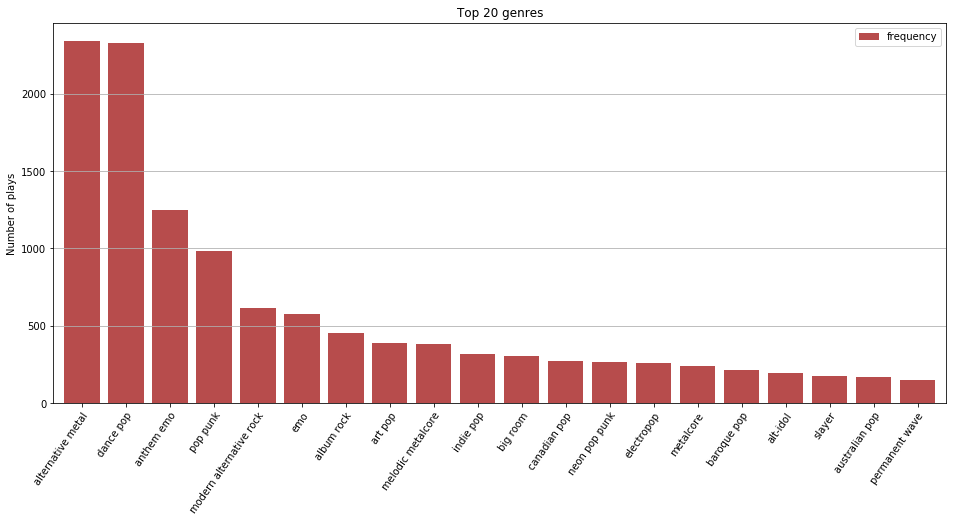

In [80]:
ax = genre_df.head(20).plot(kind='bar', figsize=[16, 7], width=0.8, alpha=0.7, color='#990000')
ax.yaxis.grid(True)
ax.set_xticklabels(genre_df.index,rotation=55, rotation_mode='anchor', ha='right')
ax.set_title('Top 20 genres')
ax.set_xlabel('',)
ax.set_ylabel('Number of plays')

plt.show()